- Logistic Regression is a linear classifier
- We will see:
    - The biological inspiration - neurons and perceptron
    - Logistic regression schematic
    - Feedforward mechanism, probabilistic interpretation
    - Cross-entropy error function
    - Max-likelihood
    - Gradient Descent
    - Practical problems
        - Regularization
        - Donut problem
        - XOR problem
        
        
- Course Project
    - Predict user actions on site
    - Direct monetary impact
        - Predict bounce -> pop up to 
        - Aspects of the site which are weak (not completing checkout)
        - Mobile experience user friendliness (buying mobile vs desktop)
     - Labels: (bounce, add_to_cart, begin_checkout, finish_checkout)

In [4]:
# A form of data preprocessing 
# One hot encoding example:
import pandas as pd
df = pd.read_csv('../machine_learning_examples/ann_logistic_extra/ecommerce_data.csv')
df.time_of_day.unique()
# Time of day has already been categorized into 4 classes - 0, 1, 2, 3

array([3, 2, 1, 0])

In [13]:
# The key to not using these numbers as is
#   is the realization that these numbers
#   are really labels, rather than a measure.
# A number has meaning as a feature only when 
#   the number can be attributed interpretation 
#   of scale and distance.

import numpy as np
# Convert time of data into one-hot vectors.
'''
time0 = np.array([1,0,0,0])
time1 = np.array([0,1,0,0])
time2 = np.array([0,0,1,0])
time3 = np.array([0,0,0,1])
'''

df[['time_of_day']].join(pd.get_dummies(df['time_of_day'], prefix='time')).head()

,time_of_day,time_0,time_1,time_2,time_3
0,3,0,0,0,1
1,2,0,0,1,0
2,1,0,1,0,0
3,1,0,1,0,0
4,1,0,1,0,0


### Linear regression in its simplest form:

2D classification

$y = mx + b$ or $0 = ax + by + c$


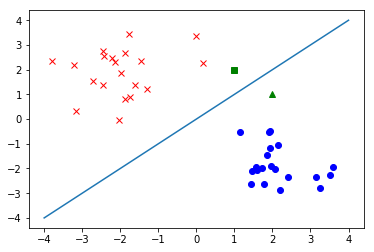

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mu1 = [-2,2]
cov1 = [[1, 0], [0, 1]]
class1 = [np.random.multivariate_normal(mu1, cov1) for _ in range(20)]

mu2 = [2,-2]
cov2 = [[1, 0], [0, 1]]
class2 = [np.random.multivariate_normal(mu2, cov2) for _ in range(20)]

class1X, class1Y = zip(*class1)
class2X, class2Y = zip(*class2)

plt.plot(class1X, class1Y, 'rx')
plt.plot(class2X, class2Y, 'bo')

X = Y = [-4,-3,-2,-1,0,1,2,3,4]
plt.plot(X, Y)

plt.plot(2, 1, 'g^')
plt.plot(1, 2, 'gs')

In the figure above, we use $a = 1, b = -1, c = 0$ in the equation $0 = ax + by + c$

In other words, 0 = x - y is the line.

Suppose you get new points $(2, 1)$ and $(1, 2)$. Should it be classified as x or $o$?

$h(x, y) = x - y$

$h(2, 1) = 1 > 0 \Rightarrow o$

$h(1, 2) = -1 < 0 \Rightarrow x$

So, $h(x, y) = 0$ is the line that separates the classes. $h(x, y) > 0$ is one class and $h(x, y) < 0$ is another class.


### Machine Learning Lingo

$(x, y) \Rightarrow (x_1, x_2) = \mathbf{x}$ 

We rename constants $a, b, c$ to $w_i$. Specifically, the bias term $c$ is $w_0$.

$h(\mathbf{x}) = w_0 + w_1 x_1 + w_2 x_2$

$h$ is a **linear combination of the components of x**

In vector form $h(\mathbf{x}) = \mathbf{w}^T \mathbf{x}$

- We saw that in 2 dimensions (when $\mathbf{x}$ had 2 components), the separator was a line. 
- In 3 dimensions, the separator is a plane
- For > 3 dimensions, it is called a hyperplane
- If we had a non-linear function separating our data, we would call it a hypersurface.

### Difference between logistic regression and general linear classifier
- A logistic function at the end which gives a number between zero and one
- When classifying, we say anything above 0.5 is class 1 and anything below 0.5 is class 0.
- Before we had $\mathbf{w} * \mathbf{x} > 0 \Rightarrow 1$
- Now we have   $\sigma(\mathbf{w} * \mathbf{x}) > 0.5 \Rightarrow 1$

In [34]:
# Why Sigmoid de-facto and not something else: https://stats.stackexchange.com/questions/162988/why-sigmoid-function-instead-of-anything-else

In [35]:
N = 100
D = 2

X = np.random.randn(N, D)

# Adding columns of ones for the bias
ones = np.array([[1] * N]).T

Xb = np.concatenate((ones , X), axis=1)

w = np.random.randn(D + 1)

z = Xb.dot(w) #Compare with W^t X

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

print(sigmoid(z))

[ 0.76372798  0.42173098  0.70582225  0.86555053  0.65074132  0.74696046
  0.50538487  0.75200702  0.70559783  0.76527019  0.71591875  0.78504095
  0.48010999  0.64079714  0.33262526  0.78352     0.71049081  0.4398705
  0.50266377  0.60133564  0.31552435  0.2921048   0.46843683  0.49764743
  0.64883721  0.62512267  0.85902931  0.77536915  0.70610252  0.434774
  0.73731729  0.61891731  0.69665299  0.69146931  0.86052316  0.67258021
  0.55395166  0.71939092  0.73337996  0.87064307  0.46041377  0.49417166
  0.10084354  0.17373094  0.86891621  0.67707434  0.53379312  0.83156036
  0.66217281  0.70030263  0.7628844   0.66046719  0.58835664  0.56847507
  0.25485415  0.75695949  0.71917909  0.60236833  0.70009452  0.45356009
  0.4149765   0.28811354  0.59728268  0.81937893  0.31970133  0.62245781
  0.84940082  0.27155398  0.6249418   0.89386309  0.64556564  0.34215879
  0.56526217  0.47170097  0.81431766  0.65407601  0.59588572  0.72247865
  0.74098977  0.55588153  0.65421318  0.59159221  0.56

In [36]:
# Pause for a moment and think what this meant.
# D = 2 implies a 2 component/feature input
# N = 100 implies a 100 datapoints
# Note that we aren't doing any classification here, just sigmoid
# Also note how the built-in function took an array z and exponentiated 
#    it elementwise